Packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from sklearn.preprocessing import MinMaxScaler
drive.mount('/content/drive')

Mounted at /content/drive


##Import Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Import Dataset
location = "/content/drive/MyDrive/Dataset/"
df = pd.read_csv(location + "gym_members_exercise_tracking.csv", sep=",")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


#Cleaning

In [ ]:
# Scalling Min Max
if 'BMI' in df.columns:
    scaler = MinMaxScaler()
    df['BMI_Scaled'] = scaler.fit_transform(df[['BMI']])

    print("\nData BMI sebelum dan sesudah scaling:")
    print(df[['BMI', 'BMI_Scaled']].head())

    print("\nRange Min-Max:")
    print(f"Min BMI: {scaler.data_min_[0]}, Max BMI: {scaler.data_max_[0]}")
else:
    print("Kolom 'BMI' tidak ditemukan dalam dataset.")
df.head(100)

Kolom 'BMI' tidak ditemukan dalam dataset.


,age,gender,weight_kg,height_m,max_bpm,avg_bpm,resting_bpm,session_duration_hours,calories_burned,workout_type,fat_percentage,water_intake_liters,workout_frequency_days/week,experience_level,bmi,bmi_scaled
0,56,Male,0.552000,1.71,180,157,60,1.69,0.779923,Yoga,12.6,3.5,4,3,30.20,0.628030
1,46,Female,0.398857,1.53,179,151,66,1.30,0.447876,Hiit,33.9,2.1,4,2,32.00,0.691254
2,32,Female,0.321143,1.66,167,122,54,1.11,0.288803,Cardio,33.4,2.3,4,2,24.71,0.435195
3,25,Male,0.150857,1.70,190,164,56,0.59,0.176834,Strength,28.8,2.1,3,1,18.41,0.213909
4,38,Male,0.069714,1.79,188,158,68,0.64,0.195367,Strength,29.2,2.8,3,1,14.39,0.072708
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,29,Male,0.212571,1.61,198,122,72,1.20,0.387645,Yoga,23.4,2.0,3,2,22.61,0.361433
103,51,Male,0.792000,1.78,182,157,64,0.54,0.090347,Strength,28.7,3.3,3,1,34.50,0.779066
104,50,Male,0.338286,1.96,166,139,68,0.97,0.281081,Strength,25.6,2.0,3,1,18.12,0.203723
105,40,Female,0.185143,1.79,198,153,57,1.79,0.823166,Yoga,17.6,2.7,5,3,17.54,0.183351


In [ ]:
df.columns = (
    df.columns.str.strip()
    .str.lower()
    .str.replace(" ", "_")
    .str.replace("(", "", regex=False)
    .str.replace(")", "", regex=False)
)

# Periksa nama kolom yang sudah dinormalisasi
print(df.columns)
df.head(100)

Index(['age', 'gender', 'weight_kg', 'height_m', 'max_bpm', 'avg_bpm',
       'resting_bpm', 'session_duration_hours', 'calories_burned',
       'workout_type', 'fat_percentage', 'water_intake_liters',
       'workout_frequency_days/week', 'experience_level', 'bmi', 'bmi_scaled'],
      dtype='object')


,age,gender,weight_kg,height_m,max_bpm,avg_bpm,resting_bpm,session_duration_hours,calories_burned,workout_type,fat_percentage,water_intake_liters,workout_frequency_days/week,experience_level,bmi,bmi_scaled
0,56,Male,0.552000,1.71,180,157,60,1.69,0.779923,Yoga,12.6,3.5,4,3,30.20,0.628030
1,46,Female,0.398857,1.53,179,151,66,1.30,0.447876,Hiit,33.9,2.1,4,2,32.00,0.691254
2,32,Female,0.321143,1.66,167,122,54,1.11,0.288803,Cardio,33.4,2.3,4,2,24.71,0.435195
3,25,Male,0.150857,1.70,190,164,56,0.59,0.176834,Strength,28.8,2.1,3,1,18.41,0.213909
4,38,Male,0.069714,1.79,188,158,68,0.64,0.195367,Strength,29.2,2.8,3,1,14.39,0.072708
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,29,Male,0.212571,1.61,198,122,72,1.20,0.387645,Yoga,23.4,2.0,3,2,22.61,0.361433
103,51,Male,0.792000,1.78,182,157,64,0.54,0.090347,Strength,28.7,3.3,3,1,34.50,0.779066
104,50,Male,0.338286,1.96,166,139,68,0.97,0.281081,Strength,25.6,2.0,3,1,18.12,0.203723
105,40,Female,0.185143,1.79,198,153,57,1.79,0.823166,Yoga,17.6,2.7,5,3,17.54,0.183351


In [ ]:
# Identifikasi outliers dengan metode IQR
numeric_columns = [
    "weight_kg",
    "bmi",
    "calories_burned",
    "fat_percentage",
    "session_duration_hours",
]

for col in numeric_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Filter outliers
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# Menampilkan informasi dataset setelah menghilangkan outliers
print(df.describe())
df.head(100)

              age   weight_kg    height_m     max_bpm     avg_bpm  \
count  912.000000  912.000000  912.000000  912.000000  912.000000   
mean    38.716009    0.354642    1.721612  179.811404  143.348684   
std     12.085655    0.209435    0.128386   11.507625   14.277750   
min     18.000000    0.000000    1.500000  160.000000  120.000000   
25%     28.000000    0.202286    1.620000  170.000000  131.000000   
50%     40.000000    0.322286    1.710000  180.000000  142.000000   
75%     49.000000    0.485714    1.800000  190.000000  156.000000   
max     59.000000    0.940571    2.000000  199.000000  169.000000   

       resting_bpm  session_duration_hours  calories_burned  fat_percentage  \
count   912.000000              912.000000       912.000000      912.000000   
mean     62.105263                1.256513         0.459995       25.131689   
std       7.365918                0.340727         0.203272        6.278048   
min      50.000000                0.500000         0.000000   

,age,gender,weight_kg,height_m,max_bpm,avg_bpm,resting_bpm,session_duration_hours,calories_burned,workout_type,fat_percentage,water_intake_liters,workout_frequency_days/week,experience_level,bmi,bmi_scaled
0,56,Male,0.552000,1.71,180,157,60,1.69,0.779923,Yoga,12.6,3.5,4,3,30.20,0.628030
1,46,Female,0.398857,1.53,179,151,66,1.30,0.447876,Hiit,33.9,2.1,4,2,32.00,0.691254
2,32,Female,0.321143,1.66,167,122,54,1.11,0.288803,Cardio,33.4,2.3,4,2,24.71,0.435195
3,25,Male,0.150857,1.70,190,164,56,0.59,0.176834,Strength,28.8,2.1,3,1,18.41,0.213909
4,38,Male,0.069714,1.79,188,158,68,0.64,0.195367,Strength,29.2,2.8,3,1,14.39,0.072708
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,51,Male,0.792000,1.78,182,157,64,0.54,0.090347,Strength,28.7,3.3,3,1,34.50,0.779066
104,50,Male,0.338286,1.96,166,139,68,0.97,0.281081,Strength,25.6,2.0,3,1,18.12,0.203723
105,40,Female,0.185143,1.79,198,153,57,1.79,0.823166,Yoga,17.6,2.7,5,3,17.54,0.183351
106,41,Male,0.362286,1.96,162,168,51,0.51,0.093436,Yoga,27.3,2.5,2,1,18.66,0.222691


In [ ]:
# Normalisasi gender
df['gender'] = df['gender'].str.strip().str.capitalize()

# Normalisasi workout_type
df['workout_type'] = df['workout_type'].str.strip().str.title()

# Tampilkan kategori unik untuk memverifikasi
print(df['gender'].unique())
print(df['workout_type'].unique())
df.head(100)

['Male' 'Female']
['Yoga' 'Hiit' 'Cardio' 'Strength']


,age,gender,weight_kg,height_m,max_bpm,avg_bpm,resting_bpm,session_duration_hours,calories_burned,workout_type,fat_percentage,water_intake_liters,workout_frequency_days/week,experience_level,bmi,bmi_scaled
0,56,Male,0.552000,1.71,180,157,60,1.69,0.779923,Yoga,12.6,3.5,4,3,30.20,0.628030
1,46,Female,0.398857,1.53,179,151,66,1.30,0.447876,Hiit,33.9,2.1,4,2,32.00,0.691254
2,32,Female,0.321143,1.66,167,122,54,1.11,0.288803,Cardio,33.4,2.3,4,2,24.71,0.435195
3,25,Male,0.150857,1.70,190,164,56,0.59,0.176834,Strength,28.8,2.1,3,1,18.41,0.213909
4,38,Male,0.069714,1.79,188,158,68,0.64,0.195367,Strength,29.2,2.8,3,1,14.39,0.072708
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,51,Male,0.792000,1.78,182,157,64,0.54,0.090347,Strength,28.7,3.3,3,1,34.50,0.779066
104,50,Male,0.338286,1.96,166,139,68,0.97,0.281081,Strength,25.6,2.0,3,1,18.12,0.203723
105,40,Female,0.185143,1.79,198,153,57,1.79,0.823166,Yoga,17.6,2.7,5,3,17.54,0.183351
106,41,Male,0.362286,1.96,162,168,51,0.51,0.093436,Yoga,27.3,2.5,2,1,18.66,0.222691


In [ ]:
# Mengecek missing values
print(df.isnull().sum())

# Imputasi missing values (contoh)
df['bmi'] = df['bmi'].fillna(df['bmi'].median())
df['workout_type'] = df['workout_type'].fillna('Unknown')

# Hapus baris dengan banyak missing values
df = df.dropna()
df.head(100)

age                            0
gender                         0
weight_kg                      0
height_m                       0
max_bpm                        0
avg_bpm                        0
resting_bpm                    0
session_duration_hours         0
calories_burned                0
workout_type                   0
fat_percentage                 0
water_intake_liters            0
workout_frequency_days/week    0
experience_level               0
bmi                            0
bmi_scaled                     0
dtype: int64


,age,gender,weight_kg,height_m,max_bpm,avg_bpm,resting_bpm,session_duration_hours,calories_burned,workout_type,fat_percentage,water_intake_liters,workout_frequency_days/week,experience_level,bmi,bmi_scaled
0,56,Male,0.552000,1.71,180,157,60,1.69,0.779923,Yoga,12.6,3.5,4,3,30.20,0.628030
1,46,Female,0.398857,1.53,179,151,66,1.30,0.447876,Hiit,33.9,2.1,4,2,32.00,0.691254
2,32,Female,0.321143,1.66,167,122,54,1.11,0.288803,Cardio,33.4,2.3,4,2,24.71,0.435195
3,25,Male,0.150857,1.70,190,164,56,0.59,0.176834,Strength,28.8,2.1,3,1,18.41,0.213909
4,38,Male,0.069714,1.79,188,158,68,0.64,0.195367,Strength,29.2,2.8,3,1,14.39,0.072708
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,51,Male,0.792000,1.78,182,157,64,0.54,0.090347,Strength,28.7,3.3,3,1,34.50,0.779066
104,50,Male,0.338286,1.96,166,139,68,0.97,0.281081,Strength,25.6,2.0,3,1,18.12,0.203723
105,40,Female,0.185143,1.79,198,153,57,1.79,0.823166,Yoga,17.6,2.7,5,3,17.54,0.183351
106,41,Male,0.362286,1.96,162,168,51,0.51,0.093436,Yoga,27.3,2.5,2,1,18.66,0.222691


In [ ]:
# Konversi Tipe Data
df['weight_kg'] = df['weight_kg'].astype(float)
df['gender'] = df['gender'].astype('category')
df.head(100)

,age,gender,weight_kg,height_m,max_bpm,avg_bpm,resting_bpm,session_duration_hours,calories_burned,workout_type,fat_percentage,water_intake_liters,workout_frequency_days/week,experience_level,bmi,bmi_scaled
0,56,Male,0.552000,1.71,180,157,60,1.69,0.779923,Yoga,12.6,3.5,4,3,30.20,0.628030
1,46,Female,0.398857,1.53,179,151,66,1.30,0.447876,Hiit,33.9,2.1,4,2,32.00,0.691254
2,32,Female,0.321143,1.66,167,122,54,1.11,0.288803,Cardio,33.4,2.3,4,2,24.71,0.435195
3,25,Male,0.150857,1.70,190,164,56,0.59,0.176834,Strength,28.8,2.1,3,1,18.41,0.213909
4,38,Male,0.069714,1.79,188,158,68,0.64,0.195367,Strength,29.2,2.8,3,1,14.39,0.072708
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,51,Male,0.792000,1.78,182,157,64,0.54,0.090347,Strength,28.7,3.3,3,1,34.50,0.779066
104,50,Male,0.338286,1.96,166,139,68,0.97,0.281081,Strength,25.6,2.0,3,1,18.12,0.203723
105,40,Female,0.185143,1.79,198,153,57,1.79,0.823166,Yoga,17.6,2.7,5,3,17.54,0.183351
106,41,Male,0.362286,1.96,162,168,51,0.51,0.093436,Yoga,27.3,2.5,2,1,18.66,0.222691


In [ ]:
# Cek duplikasi
print(df.duplicated().sum())

# Hapus duplikasi
df = df.drop_duplicates()
df.head(100)

0


,age,gender,weight_kg,height_m,max_bpm,avg_bpm,resting_bpm,session_duration_hours,calories_burned,workout_type,fat_percentage,water_intake_liters,workout_frequency_days/week,experience_level,bmi,bmi_scaled
0,56,Male,0.552000,1.71,180,157,60,1.69,0.779923,Yoga,12.6,3.5,4,3,30.20,0.628030
1,46,Female,0.398857,1.53,179,151,66,1.30,0.447876,Hiit,33.9,2.1,4,2,32.00,0.691254
2,32,Female,0.321143,1.66,167,122,54,1.11,0.288803,Cardio,33.4,2.3,4,2,24.71,0.435195
3,25,Male,0.150857,1.70,190,164,56,0.59,0.176834,Strength,28.8,2.1,3,1,18.41,0.213909
4,38,Male,0.069714,1.79,188,158,68,0.64,0.195367,Strength,29.2,2.8,3,1,14.39,0.072708
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,51,Male,0.792000,1.78,182,157,64,0.54,0.090347,Strength,28.7,3.3,3,1,34.50,0.779066
104,50,Male,0.338286,1.96,166,139,68,0.97,0.281081,Strength,25.6,2.0,3,1,18.12,0.203723
105,40,Female,0.185143,1.79,198,153,57,1.79,0.823166,Yoga,17.6,2.7,5,3,17.54,0.183351
106,41,Male,0.362286,1.96,162,168,51,0.51,0.093436,Yoga,27.3,2.5,2,1,18.66,0.222691


#EDA

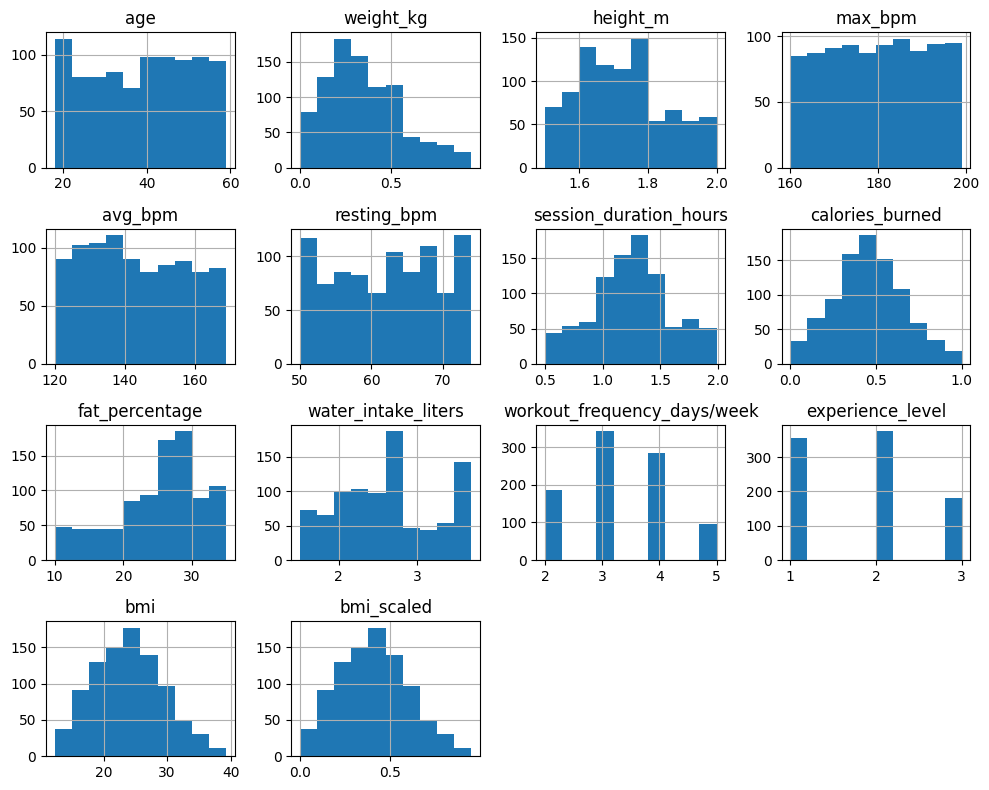

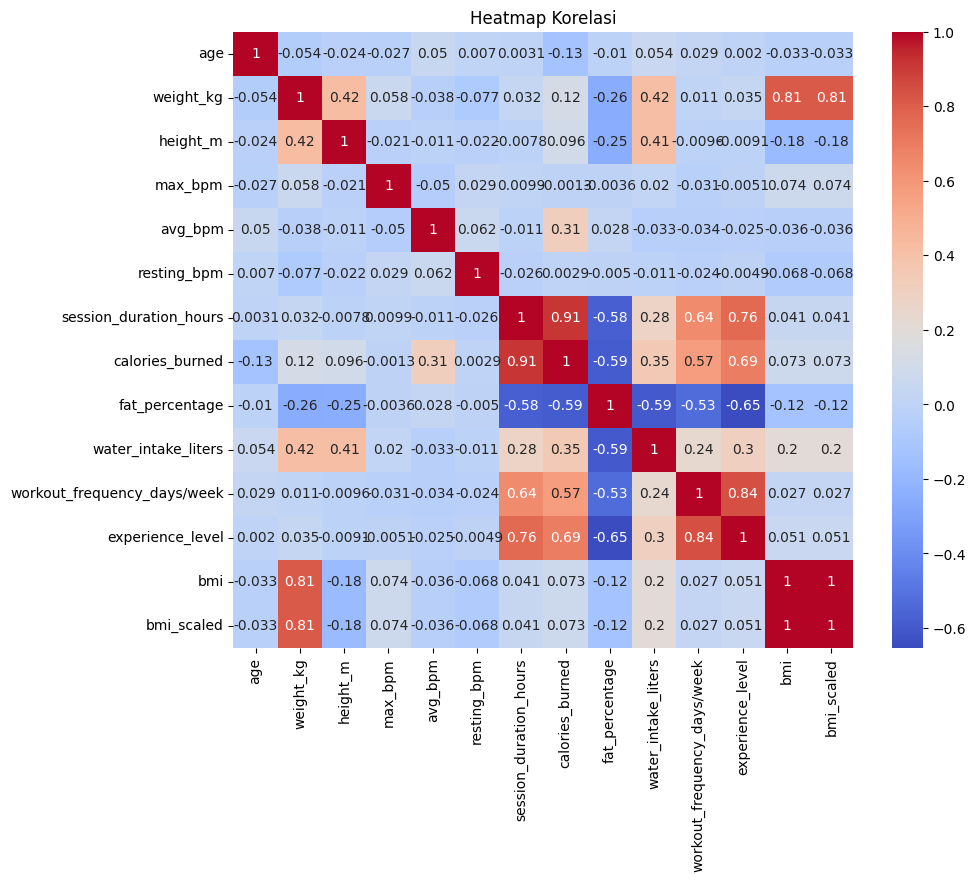

In [ ]:
# Visualisasi distribusi variabel numerik
df.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()
numeric_cols = df.select_dtypes(include='number')

# Heatmap korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi')
plt.show()


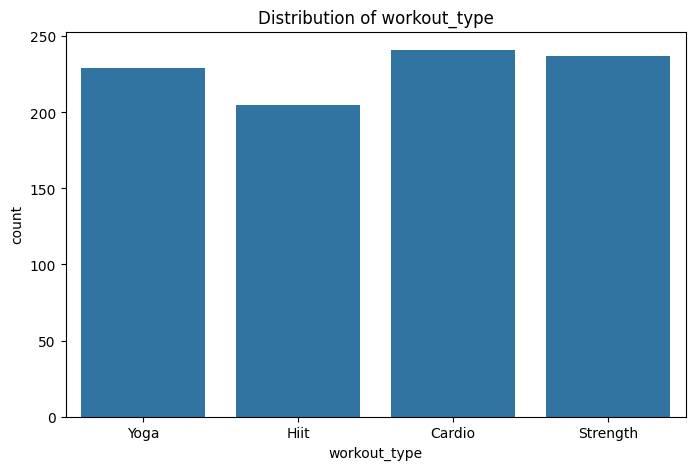

In [ ]:
# Countplot
for col in df.select_dtypes(include='object').columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.show()

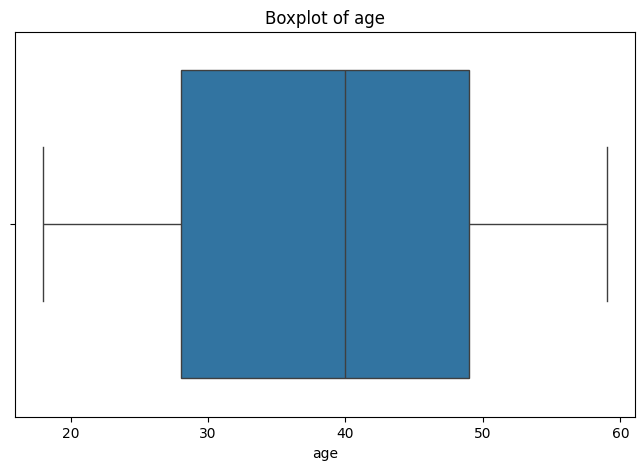

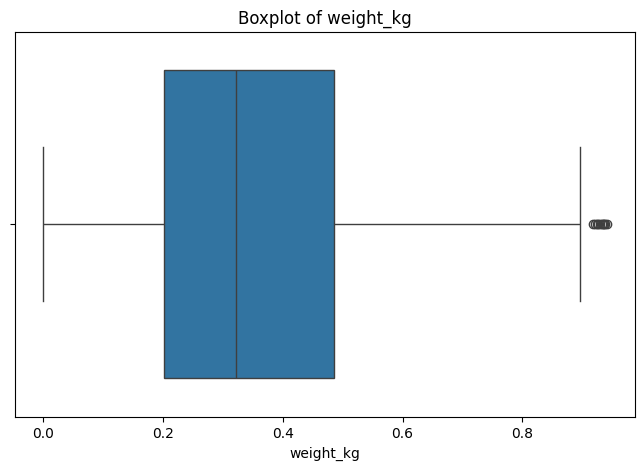

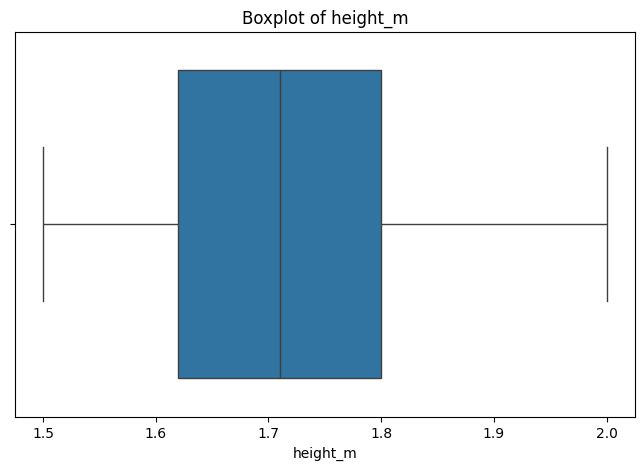

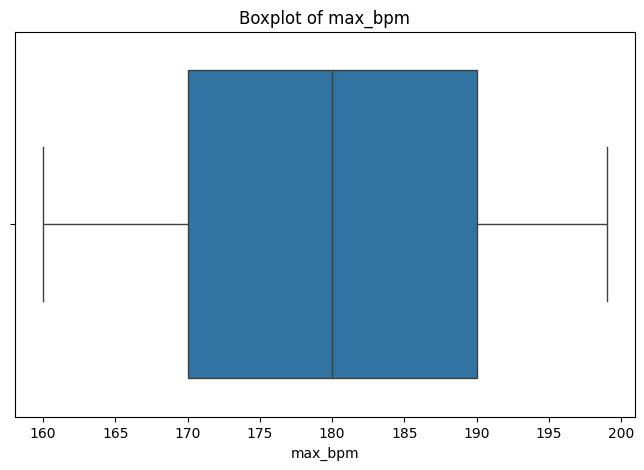

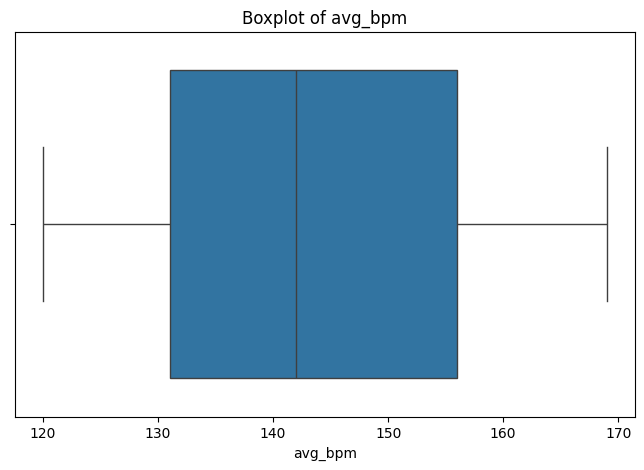

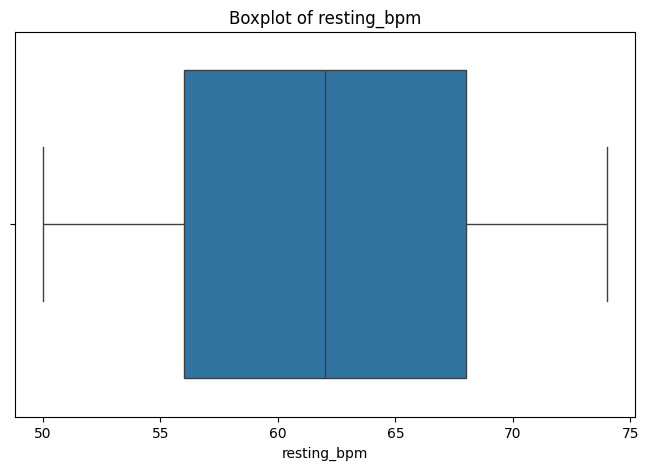

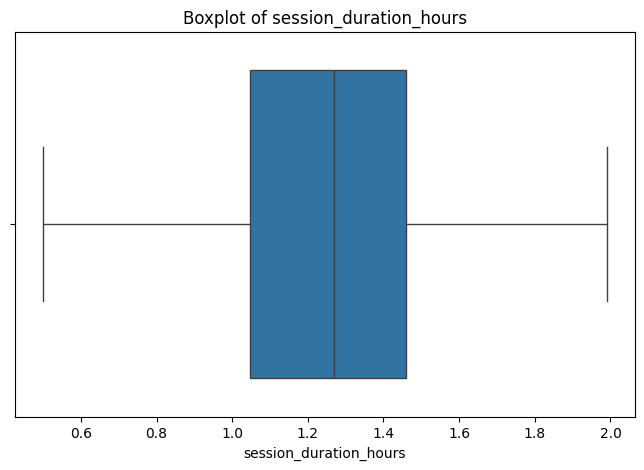

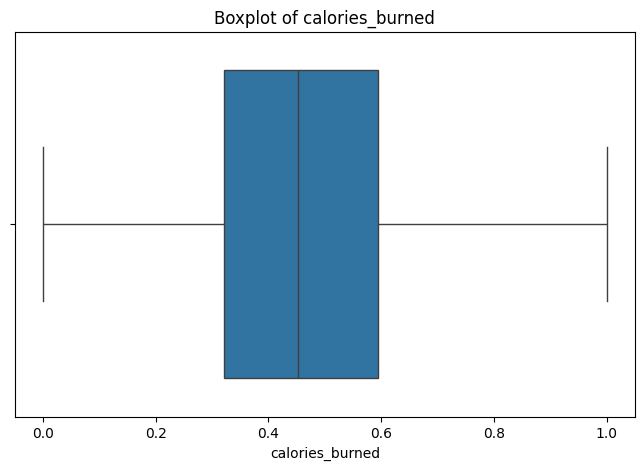

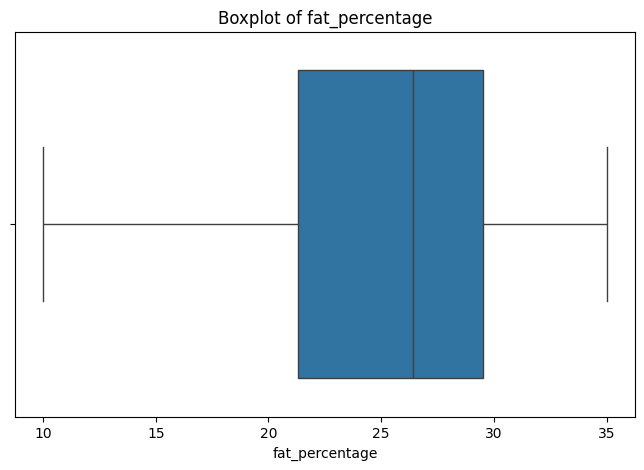

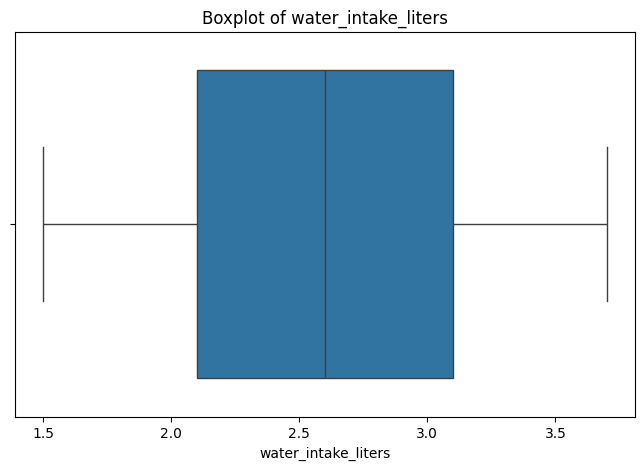

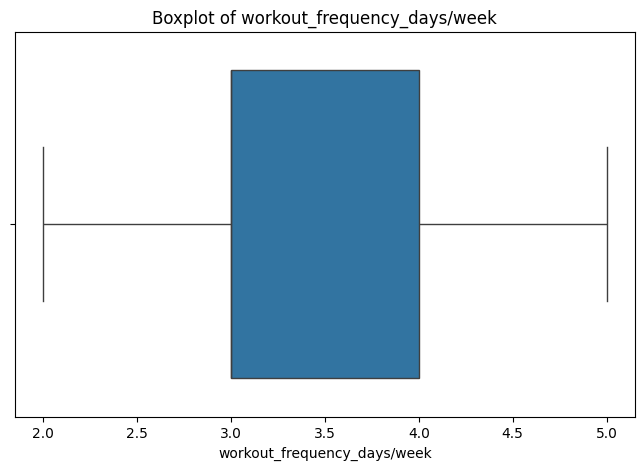

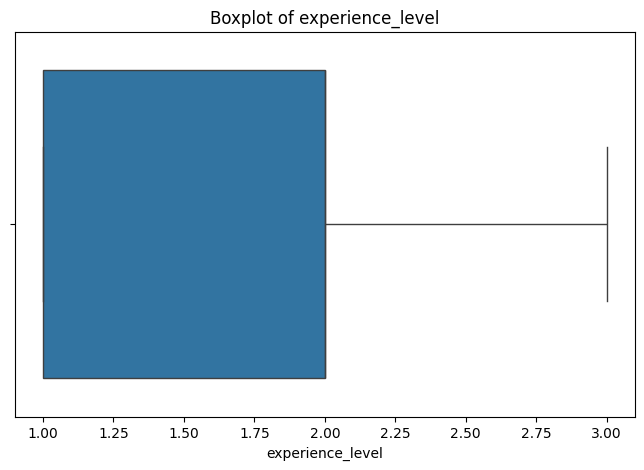

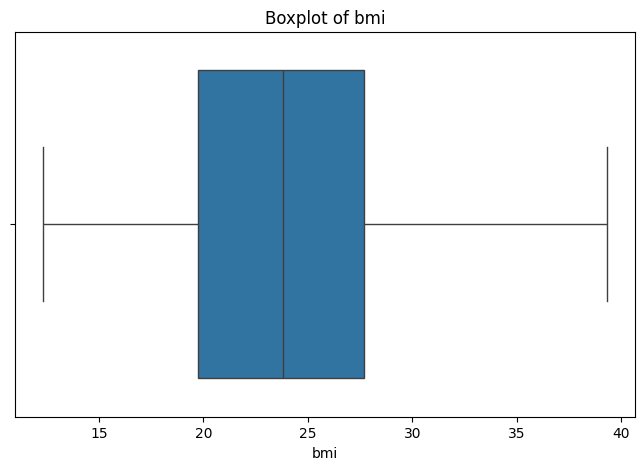

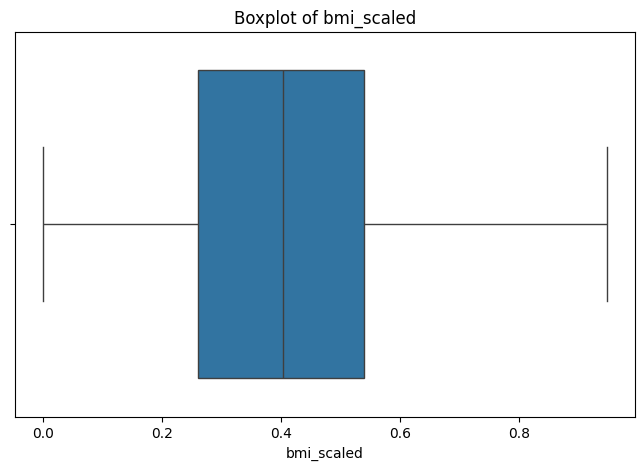

In [ ]:
for col in df.select_dtypes(include='number').columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [ ]:
sns.pairplot(df)
plt.show()

# BMI CLASSIFICATION
Cut-off points of each category determined by the World Health Organization (WHO)

World Health Organization

*   Severely Underweight: <16 kg/m2
*   Underweight: 16.0 to 18.4 kg/m2
*   Normal weight: 18.5 to 24.9 kg/m2
*   Overweight: 25.0 to 29.9 kg/m2
*   Moderately Obese: 30.0 to 34.9 kg/m2
*   Severely Obese: 35.0 to 39.9 kg/m2
*   Morbidly Obese: ≥40.0 kg/m2

Reference : https://www.ncbi.nlm.nih.gov/books/NBK535456/

In [ ]:
# klasifikasi BMI yang dimasukkan di kolom baru bernama "BMI_class"
def classify_bmi(bmi):
    if bmi < 16:
        return 'Severely Underweight'
    elif 16 <= bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 25:
        return 'Normal weight'
    elif 25 <= bmi < 30:
        return 'Overweight'
    elif 30 <= bmi < 35:
        return 'Moderately Obese'
    elif 35 <= bmi < 40:
        return 'Severely Obese'
    else:
        return 'Morbidly Obese'

df['BMI_class'] = df['bmi'].apply(classify_bmi)

In [ ]:
df.head()

,age,gender,weight_kg,height_m,max_bpm,avg_bpm,resting_bpm,session_duration_hours,calories_burned,workout_type,fat_percentage,water_intake_liters,workout_frequency_days/week,experience_level,bmi,bmi_scaled,BMI_class
0,56,Male,0.552000,1.71,180,157,60,1.69,0.779923,Yoga,12.6,3.5,4,3,30.20,0.628030,Moderately Obese
1,46,Female,0.398857,1.53,179,151,66,1.30,0.447876,Hiit,33.9,2.1,4,2,32.00,0.691254,Moderately Obese
2,32,Female,0.321143,1.66,167,122,54,1.11,0.288803,Cardio,33.4,2.3,4,2,24.71,0.435195,Normal weight
3,25,Male,0.150857,1.70,190,164,56,0.59,0.176834,Strength,28.8,2.1,3,1,18.41,0.213909,Underweight
4,38,Male,0.069714,1.79,188,158,68,0.64,0.195367,Strength,29.2,2.8,3,1,14.39,0.072708,Severely Underweight


In [ ]:
# Export dataset
df.to_csv('gym_clean_BMIclass.csv', index=False)

In [ ]:
bmi_class_counts = df['BMI_class'].value_counts()

In [ ]:
total_count = len (df)

In [ ]:
bmi_class_percentage = (bmi_class_counts / total_count) * 100

In [ ]:
bmi_class_percentage

,count
BMI_class,
Normal weight,40.241228
Overweight,26.535088
Moderately Obese,11.732456
Underweight,10.964912
Severely Underweight,7.456140
Severely Obese,3.070175


In [ ]:
# Combine the specified BMI classes into a new category
df['Obesity'] = df['BMI_class'].apply(lambda x: 'Obese' if x in ['Moderately Obese', 'Severely Obese', 'Morbidly Obese'] else x)

In [ ]:
df.head()

,age,gender,weight_kg,height_m,max_bpm,avg_bpm,resting_bpm,session_duration_hours,calories_burned,workout_type,fat_percentage,water_intake_liters,workout_frequency_days/week,experience_level,bmi,bmi_scaled,BMI_class,Obesity
0,56,Male,0.552000,1.71,180,157,60,1.69,0.779923,Yoga,12.6,3.5,4,3,30.20,0.628030,Moderately Obese,Obese
1,46,Female,0.398857,1.53,179,151,66,1.30,0.447876,Hiit,33.9,2.1,4,2,32.00,0.691254,Moderately Obese,Obese
2,32,Female,0.321143,1.66,167,122,54,1.11,0.288803,Cardio,33.4,2.3,4,2,24.71,0.435195,Normal weight,Normal weight
3,25,Male,0.150857,1.70,190,164,56,0.59,0.176834,Strength,28.8,2.1,3,1,18.41,0.213909,Underweight,Underweight
4,38,Male,0.069714,1.79,188,158,68,0.64,0.195367,Strength,29.2,2.8,3,1,14.39,0.072708,Severely Underweight,Severely Underweight


In [ ]:
# Group Obesity by Gender and age
obesity_counts = df[df['Obesity'] == 'Obese'].groupby(['gender', 'age']).size().reset_index(name='Count')

# Find the gender and age group with the highest count of obesity
obesity_counts.loc[obesity_counts['Count'].idxmax()]

<ipython-input-33-29edf6a89dea>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obesity_counts = df[df['Obesity'] == 'Obese'].groupby(['gender', 'age']).size().reset_index(name='Count')


,69
gender,Male
age,50
Count,8


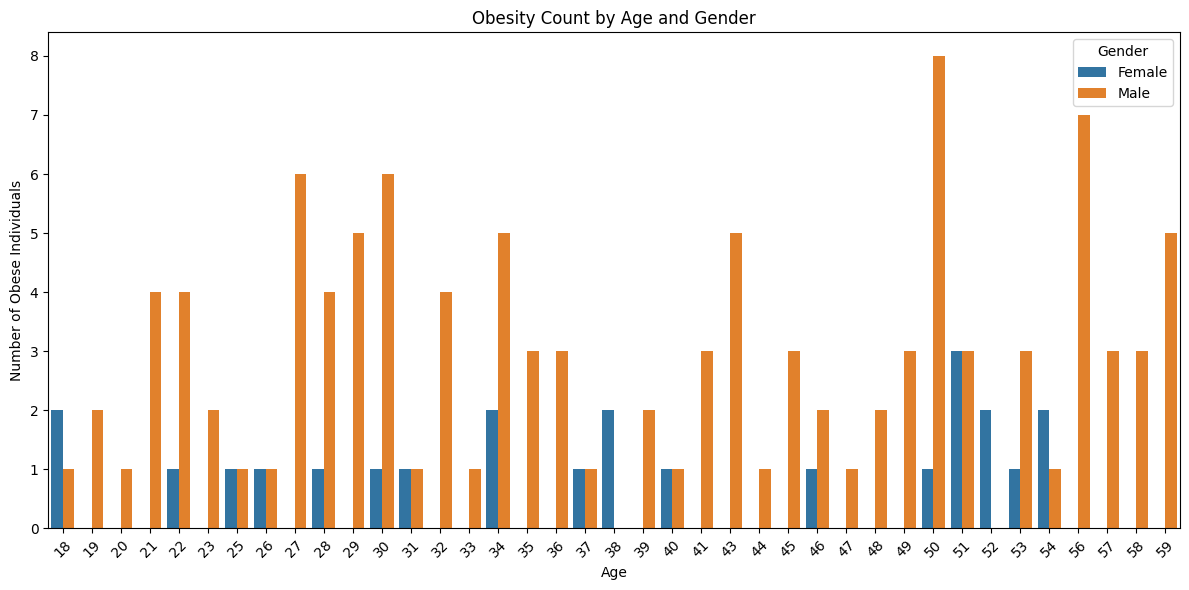

In [ ]:
plt.figure(figsize=(12, 6))  # Adjust figure size if needed
sns.barplot(x='age', y='Count', hue='gender', data=obesity_counts)
plt.title('Obesity Count by Age and Gender')
plt.xlabel('Age')
plt.ylabel('Number of Obese Individuals')
plt.xticks(rotation=45)  # Rotate x-axis labels if they overlap
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

In [ ]:
# Group BMI class (Severely Underweight) by Gender and age
Severely_Underweight_counts = df[df['BMI_class'] == 'Severely Underweight'].groupby(['gender', 'age']).size().reset_index(name='Count')

# Find the gender and age group with the highest count of severely underweight
Severely_Underweight_counts.loc[Severely_Underweight_counts['Count'].idxmax()]

<ipython-input-35-1b710a4f5308>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Severely_Underweight_counts = df[df['BMI_class'] == 'Severely Underweight'].groupby(['gender', 'age']).size().reset_index(name='Count')


,44
gender,Male
age,45
Count,4


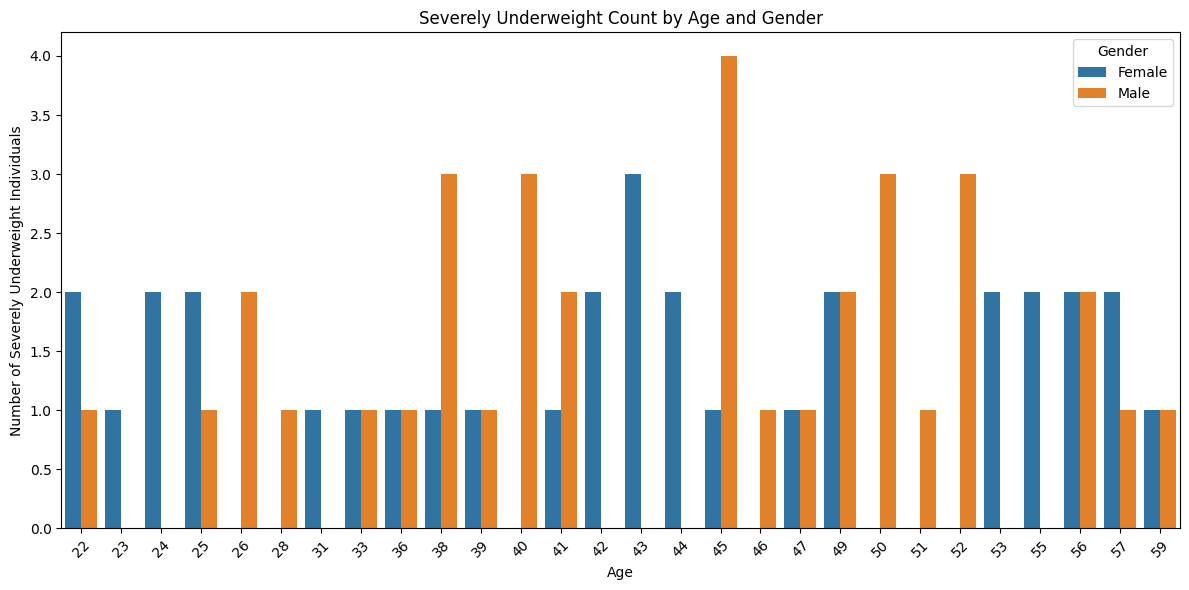

In [ ]:
plt.figure(figsize=(12, 6))  # Adjust figure size if needed
sns.barplot(x='age', y='Count', hue='gender', data=Severely_Underweight_counts)
plt.title('Severely Underweight Count by Age and Gender')
plt.xlabel('Age')
plt.ylabel('Number of Severely Underweight Individuals')
plt.xticks(rotation=45)  # Rotate x-axis labels if they overlap
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

#Predictive Analysis

##Import Packages

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

##Encoding categorical variables

In [ ]:
# Encoding Categorical Variables (gender, workout_type)
label_encoder_gender = LabelEncoder()
df['gender'] = label_encoder_gender.fit_transform(df['gender'])

label_encoder_workout_type = LabelEncoder()
df['workout_type'] = label_encoder_workout_type.fit_transform(df['workout_type'])

df.head()

,age,gender,weight_kg,height_m,max_bpm,avg_bpm,resting_bpm,session_duration_hours,calories_burned,workout_type,fat_percentage,water_intake_liters,workout_frequency_days/week,experience_level,bmi,bmi_scaled,BMI_class,Obesity
0,56,1,0.552000,1.71,180,157,60,1.69,0.779923,3,12.6,3.5,4,3,30.20,0.628030,Moderately Obese,Obese
1,46,0,0.398857,1.53,179,151,66,1.30,0.447876,1,33.9,2.1,4,2,32.00,0.691254,Moderately Obese,Obese
2,32,0,0.321143,1.66,167,122,54,1.11,0.288803,0,33.4,2.3,4,2,24.71,0.435195,Normal weight,Normal weight
3,25,1,0.150857,1.70,190,164,56,0.59,0.176834,2,28.8,2.1,3,1,18.41,0.213909,Underweight,Underweight
4,38,1,0.069714,1.79,188,158,68,0.64,0.195367,2,29.2,2.8,3,1,14.39,0.072708,Severely Underweight,Severely Underweight


For gender 1 = male and 0 = female. workout_type divided into 4 categories such as Cardio = 0, HITT = 1, Strength = 2, and Yoga = 3.

Split independent variables and dependent variables

In [ ]:
#Split X and
X = df[['gender', 'workout_type', 'weight_kg', 'avg_bpm', 'session_duration_hours', 'workout_frequency_days/week']]
y = df['calories_burned']

In [ ]:
#Scaling Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

##Construct Model

In [ ]:
#Split Data Train dan Test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
#Model Training
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(objective='reg:squarederror', random_state=42)
}

In [ ]:
#Train, Evaluate, and Compare Models
results = {}

for model_name, model in models.items():
    # Cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, scoring='r2', cv=5)
    model.fit(X_train, y_train)  # Train Model
    y_pred = model.predict(X_test)

    # Evaluate Performance
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results[model_name] = {
        "MAE": mae,
        "RMSE": rmse,
        "R2 Score": r2,
        "CV R2 Mean": np.mean(cv_scores),
        "CV R2 Std": np.std(cv_scores)
    }

In [ ]:
#Display Results
print("Model Evaluation Results:")
for model_name, metrics in results.items():
    print(f"\n{model_name}:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.4f}")

Model Evaluation Results:

Linear Regression:
  MAE: 0.0360
  RMSE: 0.0408
  R2 Score: 0.9612
  CV R2 Mean: 0.9544
  CV R2 Std: 0.0045

Decision Tree:
  MAE: 0.0546
  RMSE: 0.0694
  R2 Score: 0.8880
  CV R2 Mean: 0.9040
  CV R2 Std: 0.0188

Random Forest:
  MAE: 0.0377
  RMSE: 0.0449
  R2 Score: 0.9530
  CV R2 Mean: 0.9509
  CV R2 Std: 0.0063

XGBoost:
  MAE: 0.0363
  RMSE: 0.0443
  R2 Score: 0.9544
  CV R2 Mean: 0.9475
  CV R2 Std: 0.0041


In [ ]:
#Select the Best Model
best_model = min(results, key=lambda x: results[x]['RMSE'])
print(f"\nModel Terbaik Berdasarkan RMSE: {best_model}")


Model Terbaik Berdasarkan RMSE: Linear Regression


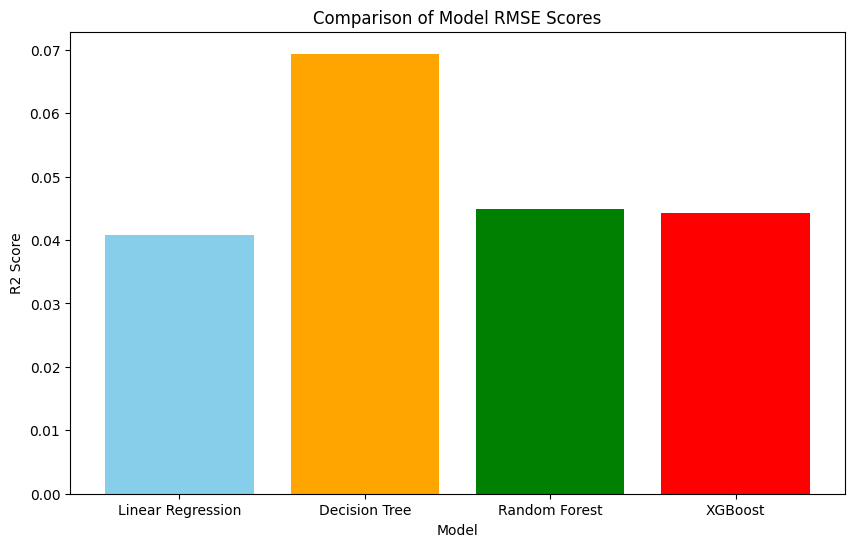

In [ ]:
#Visualize result
import matplotlib.pyplot as plt

model_names = list(results.keys())
r2_scores = [results[m]['RMSE'] for m in model_names]

plt.figure(figsize=(10, 6))
plt.bar(model_names, r2_scores, color=['skyblue', 'orange', 'green', 'red'])
plt.xlabel('Model')
plt.ylabel('R2 Score')
plt.title('Comparison of Model RMSE Scores')
plt.show()

##Predict New Data

In [ ]:
#Train model for LinearRegression
best_model = LinearRegression()
best_model.fit(X_scaled, y)

LinearRegression()

In [ ]:
#Predict New Data
#Example: gender=1 (male), workout_type=3, weight=100, AVG_BPM=90, session_duration=45, workout_frequent=3
new_data = [[1, 3, 50, 110, 300, 6]]
new_data_scaled = scaler.transform(new_data)  #Don't Forget to Scaling!
prediction = model.predict(new_data_scaled)

print(f"Prediksi Calorie Burn: {prediction[0]:.2f}")

Prediksi Calorie Burn: 0.60


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
